In [1]:
import pandas as pd

In [2]:
#read input file
kmeans_clusters = pd.read_parquet('/Users/manojitharajula/Documents/PhD/Connectome/Entity_disambiguation/kmeans/multisect_kmeans_all_clusters_max_clust_30_type_disamb.parquet',engine='pyarrow')

In [3]:
len(kmeans_clusters)

483868

In [4]:
kmeans_clusters = kmeans_clusters[kmeans_clusters['cluster_size']>1]
kmeans_clusters['node_ids_in_cluster'] = kmeans_clusters['node_ids_in_cluster'].apply(lambda x: x.tolist() if hasattr(x, "tolist") else x)

seed = 42
kmeans_clusters_rand = kmeans_clusters.sample(frac=1, random_state=seed).reset_index(drop=True)

In [5]:
kmeans_clusters_rand

,cluster_id,cluster_size,node_ids_in_cluster
0,174666,6,"[ancestral stress treatment [environment], anc..."
1,4934,3,"[substitution of Val by Met [mutation], Tyr to..."
2,329097,27,"[pairwise alignments [phenotype], Comparative ..."
3,148225,6,"[known orthologs of A. thaliana [organism], co..."
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ..."
...,...,...,...
393887,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of..."
393888,449343,10,"[MADS-box TFs [gene], TFs from the MADS-box pr..."
393889,160525,3,[the motor domain with ATPase activity [protei...
393890,179048,2,"[wider repla [phenotype], larger sizes of reco..."


In [6]:
kmeans_clusters_rand.dtypes

cluster_id              int64
cluster_size            int64
node_ids_in_cluster    object
dtype: object

In [7]:
# read file names in a directory

output_csv_path = '/Users/manojitharajula/Documents/PhD/Connectome/Entity_disambiguation/kmeans/4omini_after_finetuning/batchapi_final_outs/'
csv_file_names = ['4omini_v9_0_50k.csv', '4omini_v9_50k_100k.csv', '4omini_v9_100k_150k.csv', '4omini_v9_150k_200k.csv', '4omini_v9_200k_250k.csv', '4omini_v9_250k_300k.csv', '4omini_v9_300k_350k.csv', '4omini_v9_350k_393k.csv']

#open all csv files and put all of them in a single dataframe
all_outs_df = pd.DataFrame()
for file_name in csv_file_names:
    df = pd.read_csv(output_csv_path+file_name)
    all_outs_df = pd.concat([all_outs_df, df], ignore_index=True)




In [8]:
#convert Cluster Id column to int using try except block
count_id_fail = 0
for i,row in all_outs_df.iterrows():
    try:
        all_outs_df.at[i,'Cluster Id'] = int(row['Cluster Id'])
    except:
        all_outs_df.at[i,'Cluster Id'] = -1
        count_id_fail += 1
print('Number of rows with Cluster Id conversion failure: ', count_id_fail)

Number of rows with Cluster Id conversion failure:  26


In [9]:
len(all_outs_df)

393025

In [10]:
# remove rows with Cluster Id = -1
all_outs_df = all_outs_df[all_outs_df['Cluster Id'] != -1]
len(all_outs_df)

392999

In [11]:
all_outs_df

,Cluster Id,Group Items
0,174666,"[[""ancestral stress treatment [environment]""],..."
1,4934,"[[""substitution of Val by Met [mutation]""], [""..."
2,329097,"[[""**understanding evolutionary relationships ..."
3,148225,"[[""**counterparts in A. thaliana [organism]**""..."
4,281542,"[[""Erianthus arundinaceus [organism]""], [""E. s..."
...,...,...
393020,318199,"[[""PIF6-beta [rna]""], [""loss of EIN4 [gene]""],..."
393021,449343,"[[""**MADS-box TFs [gene]**"", ""MADS box family ..."
393022,160525,"[[""the motor domain with ATPase activity [prot..."
393023,179048,"[[""wider repla [phenotype]""], [""larger sizes o..."


In [12]:
#create a duplicate column for Group Items by name org Group Items

all_outs_df['Org Group Items'] = all_outs_df['Group Items']
all_outs_df

,Cluster Id,Group Items,Org Group Items
0,174666,"[[""ancestral stress treatment [environment]""],...","[[""ancestral stress treatment [environment]""],..."
1,4934,"[[""substitution of Val by Met [mutation]""], [""...","[[""substitution of Val by Met [mutation]""], [""..."
2,329097,"[[""**understanding evolutionary relationships ...","[[""**understanding evolutionary relationships ..."
3,148225,"[[""**counterparts in A. thaliana [organism]**""...","[[""**counterparts in A. thaliana [organism]**""..."
4,281542,"[[""Erianthus arundinaceus [organism]""], [""E. s...","[[""Erianthus arundinaceus [organism]""], [""E. s..."
...,...,...,...
393020,318199,"[[""PIF6-beta [rna]""], [""loss of EIN4 [gene]""],...","[[""PIF6-beta [rna]""], [""loss of EIN4 [gene]""],..."
393021,449343,"[[""**MADS-box TFs [gene]**"", ""MADS box family ...","[[""**MADS-box TFs [gene]**"", ""MADS box family ..."
393022,160525,"[[""the motor domain with ATPase activity [prot...","[[""the motor domain with ATPase activity [prot..."
393023,179048,"[[""wider repla [phenotype]""], [""larger sizes o...","[[""wider repla [phenotype]""], [""larger sizes o..."


In [13]:
# apply eval function to convert string to list
all_outs_df['Group Items'] =  all_outs_df['Group Items'].apply(eval)    

In [14]:
#create a dictionary with two columns
all_outs_dict = all_outs_df.set_index('Cluster Id')['Group Items'].to_dict()
all_outs_dict

{174666: [['ancestral stress treatment [environment]'],
  ['ancestral heat stress [treatment]'],
  ['ancestral disease stress [treatment]'],
  ['ancestral stress [treatment]'],
  ['transgenerational primed state [treatment]'],
  ['level of ancestral disease exposure [treatment]']],
 4934: [['substitution of Val by Met [mutation]'],
  ['Tyr to Met change in a loop [mutation]'],
  ['Val with Met [amino acid]']],
 329097: [['**understanding evolutionary relationships [phenotype]**',
   'understanding of evolutionary relationships [concept]'],
  ['**inferring phylogenetic relationships among taxa [phenotype]**',
   'determination of phylogenetic relationships [phenotype]',
   'reconstruction of evolutionary relationships [phenotype]',
   'deduce evolutionary relationships [phenotype]'],
  ['pairwise alignments [phenotype]'],
  ['Comparative evolutionary relationship [phenotype]'],
  ['Overall species relationships [phenotype]'],
  ['Intra-specific phylogenetic relationships [phenotype]'],


In [16]:
all_outs_org_dict = all_outs_df.set_index('Cluster Id')['Org Group Items'].to_dict()

## Finding missing cluster ids

In [17]:
#map the dictionary to the kmeans_clusters_rand dataframe
kmeans_clusters_rand['Group Items'] = kmeans_clusters_rand['cluster_id'].map(all_outs_dict)

In [18]:
kmeans_clusters_rand

,cluster_id,cluster_size,node_ids_in_cluster,Group Items
0,174666,6,"[ancestral stress treatment [environment], anc...","[[ancestral stress treatment [environment]], [..."
1,4934,3,"[substitution of Val by Met [mutation], Tyr to...","[[substitution of Val by Met [mutation]], [Tyr..."
2,329097,27,"[pairwise alignments [phenotype], Comparative ...",[[**understanding evolutionary relationships [...
3,148225,6,"[known orthologs of A. thaliana [organism], co...","[[**counterparts in A. thaliana [organism]**, ..."
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ...","[[Erianthus arundinaceus [organism]], [E. sati..."
...,...,...,...,...
393887,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[[PIF6-beta [rna]], [loss of EIN4 [gene]], [Lo..."
393888,449343,10,"[MADS-box TFs [gene], TFs from the MADS-box pr...","[[**MADS-box TFs [gene]**, MADS box family TFs..."
393889,160525,3,[the motor domain with ATPase activity [protei...,[[the motor domain with ATPase activity [prote...
393890,179048,2,"[wider repla [phenotype], larger sizes of reco...","[[wider repla [phenotype]], [larger sizes of r..."


In [19]:
kmeans_clusters_rand

,cluster_id,cluster_size,node_ids_in_cluster,Group Items
0,174666,6,"[ancestral stress treatment [environment], anc...","[[ancestral stress treatment [environment]], [..."
1,4934,3,"[substitution of Val by Met [mutation], Tyr to...","[[substitution of Val by Met [mutation]], [Tyr..."
2,329097,27,"[pairwise alignments [phenotype], Comparative ...",[[**understanding evolutionary relationships [...
3,148225,6,"[known orthologs of A. thaliana [organism], co...","[[**counterparts in A. thaliana [organism]**, ..."
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ...","[[Erianthus arundinaceus [organism]], [E. sati..."
...,...,...,...,...
393887,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[[PIF6-beta [rna]], [loss of EIN4 [gene]], [Lo..."
393888,449343,10,"[MADS-box TFs [gene], TFs from the MADS-box pr...","[[**MADS-box TFs [gene]**, MADS box family TFs..."
393889,160525,3,[the motor domain with ATPase activity [protei...,[[the motor domain with ATPase activity [prote...
393890,179048,2,"[wider repla [phenotype], larger sizes of reco...","[[wider repla [phenotype]], [larger sizes of r..."


In [20]:
# check for empty Group Items
missing_clusters = kmeans_clusters_rand[kmeans_clusters_rand['Group Items'].isnull()]
missing_clusters

,cluster_id,cluster_size,node_ids_in_cluster,Group Items
697,39498,8,"[Gamma-glutamyl transferase [enzyme], γ-glutam...",NaN
1579,294041,19,[dde2/ein2/pad4/sid2-quadruple mutant (deps) [...,NaN
1642,121553,8,[5-aminolevulinic acid dehydratase (ALAD) [enz...,NaN
2187,48650,20,[Transfer to the membrane environment [protein...,NaN
2201,40408,12,"[DEVDase activity [phenotype], VEIDase activit...",NaN
...,...,...,...,...
391315,308963,11,"[plt3 mutants [mutant], plt3plt5 mutants [muta...",NaN
391513,19370,23,[Two C-terminal Nuclear Localization Signals (...,NaN
391650,33801,29,"[MiMIF-2-AnnAt4 complexes [protein], ATH1-KNAT...",NaN
391779,470240,13,"[CAS family gene(s) [gene], six beta-CAs [gene...",NaN


In [21]:
# remove column Group Items
missing_clusters = missing_clusters.drop(columns=['Group Items'])
#save the dataframe to a parquet file
missing_clusters.to_parquet('/Users/manojitharajula/Documents/PhD/Connectome/Entity_disambiguation/kmeans/multisect_kmeans_all_clusters_max_clust_30_type_disamb_missing.parquet',engine='pyarrow')

In [22]:
missing_clusters.columns

Index(['cluster_id', 'cluster_size', 'node_ids_in_cluster'], dtype='object')

In [23]:
#read missing outputs
missing_csv = pd.read_csv('/Users/manojitharajula/Documents/PhD/Connectome/Entity_disambiguation/kmeans/4omini_after_finetuning/batchapi_final_outs/4omini_v9_missing_maxclust30.csv')

In [24]:
missing_csv

,Cluster Id,Group Items
0,48650,"[[""Transfer to the membrane environment [prote..."
1,216413,"[[""**function of PSII [phenotype]**"", ""PSII fu..."
2,177348,"[[""**GA-independent germination [phenotype]**""..."
3,83100,"[[""downstream response gene(s) for EMS1 [gene]..."
4,134313,"[[""**1 \n \bM ABA [treatment]**"", ""1 \n \bM AB..."
...,...,...
128,38167,"[[""MALT1 [protein]""], [""ASC [protein]""], [""14-..."
129,31147,"[[""high-resolution crystal structures [method]..."
130,180930,"[[""**delta(13)C [phenotype]**"", ""delta(13)C ra..."
131,115398,"[[""**QA [phenotype]**"", ""QA reduction state [p..."


In [25]:
#find remaining missing clusters 
missing_csv['Cluster Id'] = missing_csv['Cluster Id'].apply(lambda x: int(x))

missing_csv_cluster_ids = missing_csv['Cluster Id'].tolist()
len(missing_csv_cluster_ids)

133

### Analysis on initial first run

In [26]:
kmeans_clusters_rand.columns

Index(['cluster_id', 'cluster_size', 'node_ids_in_cluster', 'Group Items'], dtype='object')

In [27]:
first_run_clust = kmeans_clusters_rand[~kmeans_clusters_rand['Group Items'].isnull()]
first_run_clust

,cluster_id,cluster_size,node_ids_in_cluster,Group Items
0,174666,6,"[ancestral stress treatment [environment], anc...","[[ancestral stress treatment [environment]], [..."
1,4934,3,"[substitution of Val by Met [mutation], Tyr to...","[[substitution of Val by Met [mutation]], [Tyr..."
2,329097,27,"[pairwise alignments [phenotype], Comparative ...",[[**understanding evolutionary relationships [...
3,148225,6,"[known orthologs of A. thaliana [organism], co...","[[**counterparts in A. thaliana [organism]**, ..."
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ...","[[Erianthus arundinaceus [organism]], [E. sati..."
...,...,...,...,...
393887,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[[PIF6-beta [rna]], [loss of EIN4 [gene]], [Lo..."
393888,449343,10,"[MADS-box TFs [gene], TFs from the MADS-box pr...","[[**MADS-box TFs [gene]**, MADS box family TFs..."
393889,160525,3,[the motor domain with ATPase activity [protei...,[[the motor domain with ATPase activity [prote...
393890,179048,2,"[wider repla [phenotype], larger sizes of reco...","[[wider repla [phenotype]], [larger sizes of r..."


Analysis:
1. all names are same?
2. length of flattened outputs == length of inputs?
3. json format issue?
4. incomplete?

In [28]:
first_run_clust['Group Items'] = first_run_clust['Group Items'].apply(lambda x: x.tolist() if hasattr(x, "tolist") else x)


/var/folders/28/b8d1h3952xj9bg__2x97mt6r0000gn/T/ipykernel_33482/3053187109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_run_clust['Group Items'] = first_run_clust['Group Items'].apply(lambda x: x.tolist() if hasattr(x, "tolist") else x)


### Check for ones where length of Group Items =1

In [29]:
# create two columns called all_names_same and length_same
#flatten the list of lists
first_run_clust['Group Items'] = first_run_clust['Group Items'].apply(lambda x: [i.strip('*') for i in x for i in i])
first_run_clust['length_one'] = first_run_clust['Group Items'].apply(lambda x: len(set(x)) == 1)

/var/folders/28/b8d1h3952xj9bg__2x97mt6r0000gn/T/ipykernel_33482/1355713989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_run_clust['Group Items'] = first_run_clust['Group Items'].apply(lambda x: [i.strip('*') for i in x for i in i])
/var/folders/28/b8d1h3952xj9bg__2x97mt6r0000gn/T/ipykernel_33482/1355713989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_run_clust['length_one'] = first_run_clust['Group Items'].apply(lambda x: len(set(x)) == 1)


In [30]:
first_run_clust

,cluster_id,cluster_size,node_ids_in_cluster,Group Items,length_one
0,174666,6,"[ancestral stress treatment [environment], anc...","[ancestral stress treatment [environment], anc...",False
1,4934,3,"[substitution of Val by Met [mutation], Tyr to...","[substitution of Val by Met [mutation], Tyr to...",False
2,329097,27,"[pairwise alignments [phenotype], Comparative ...",[understanding evolutionary relationships [phe...,False
3,148225,6,"[known orthologs of A. thaliana [organism], co...","[counterparts in A. thaliana [organism], known...",False
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ...","[Erianthus arundinaceus [organism], E. sativa ...",False
...,...,...,...,...,...
393887,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[PIF6-beta [rna], loss of EIN4 [gene], Loss of...",False
393888,449343,10,"[MADS-box TFs [gene], TFs from the MADS-box pr...","[MADS-box TFs [gene], MADS box family TFs [gen...",False
393889,160525,3,[the motor domain with ATPase activity [protei...,[the motor domain with ATPase activity [protei...,False
393890,179048,2,"[wider repla [phenotype], larger sizes of reco...","[wider repla [phenotype], larger sizes of reco...",False


In [31]:
first_run_clust['length_one'].value_counts()

length_one
False    392927
True         72
Name: count, dtype: int64

In [32]:
length_one_true = first_run_clust[first_run_clust['length_one'] == True]
length_one_true

,cluster_id,cluster_size,node_ids_in_cluster,Group Items,length_one
3435,438215,3,[ABA-AtNAP transcription factor-SAG113 PP2C re...,[ABA-AtNAP transcription factor-SAG113 PP2C re...,True
8357,93772,3,"[3-ketoacyl thiolase (PED1) [gene], three gene...",[three gene(s) encoding type I 3-ketoacyl-CoA ...,True
9142,14169,4,[inorganic polyphosphate binding conserved his...,[inorganic polyphosphate binding conserved his...,True
14462,134512,3,"[effects of NPA on hypocotyl growth [organ], N...",[effects of NPA on hypocotyl growth [organ]],True
16301,199335,3,"[Bacterial panicle blight [condition], rice ba...",[Bacterial panicle blight [condition]],True
...,...,...,...,...,...
359251,394984,4,"[innate immune response [process], innate immu...",[pre-invasive apoplastic defense responses [pr...,True
363291,419583,5,"[CO2-induced stomatal closing [process], CO2-i...",[efficiency via stomata [process]],True
383738,270665,5,[ageing of heterotrophic tobacco cell cultures...,[ageing of heterotrophic tobacco cell cultures...,True
386929,179259,6,"[higher growth rate [phenotype], increasing RG...",[higher growth efficiency [phenotype]],True


In [33]:
length_one_true['cluster_size'].min()

2

/var/folders/28/b8d1h3952xj9bg__2x97mt6r0000gn/T/ipykernel_33482/129634571.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i,first_run_clust['length_one'].value_counts()[i],first_run_clust['length_one'].value_counts()[i], ha = 'center')


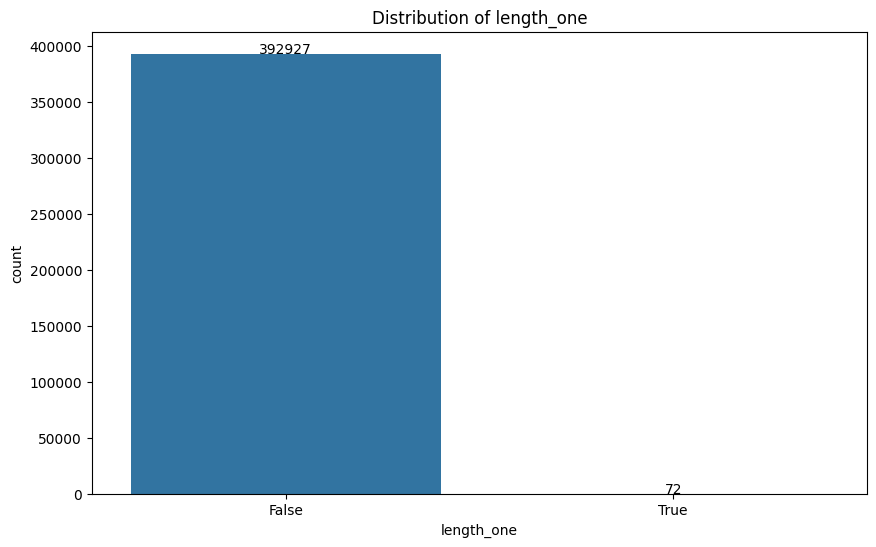

In [34]:
#plot the distribution of length_one with number on top of each bar
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='length_one', data=first_run_clust)
plt.title('Distribution of length_one')

for i in range(len(first_run_clust['length_one'].value_counts())):
    plt.text(i,first_run_clust['length_one'].value_counts()[i],first_run_clust['length_one'].value_counts()[i], ha = 'center')

plt.show()


In [35]:
#print rows where length_same is True
single_length = first_run_clust[first_run_clust['length_one'] == True]

In [36]:
single_length['Group Items'].iloc[1]

['three gene(s) encoding type I 3-ketoacyl-CoA thiolases [gene]']

In [37]:
single_length['node_ids_in_cluster'].iloc[1]

['3-ketoacyl thiolase (PED1) [gene]',
 'three gene(s) encoding type I 3-ketoacyl-CoA thiolases [gene]',
 '3-ketoacyl-CoA thiolases PED1 [gene]']

In [38]:
#print first row in Group Items column
len(set(first_run_clust['Group Items'].iloc[0]))

6

In [39]:
len(first_run_clust['node_ids_in_cluster'].iloc[0])

6

In [40]:
first_run_clust['length_one'].iloc[0]

False

In [41]:
### check for ones where length of Group Items is equal to length of node_ids_in_cluster
first_run_clust['length_same'] = first_run_clust.apply(lambda x: len(x['Group Items']) == len(x['node_ids_in_cluster']), axis=1)
first_run_clust['length_same'].value_counts()

/var/folders/28/b8d1h3952xj9bg__2x97mt6r0000gn/T/ipykernel_33482/3999294460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_run_clust['length_same'] = first_run_clust.apply(lambda x: len(x['Group Items']) == len(x['node_ids_in_cluster']), axis=1)


length_same
True     382268
False     10731
Name: count, dtype: int64

In [42]:
length_unequal = first_run_clust[first_run_clust['length_same'] == False]
length_unequal

,cluster_id,cluster_size,node_ids_in_cluster,Group Items,length_one,length_same
14,460844,5,[all predicted gene(s) of A. thaliana genome [...,"[all members from A. thaliana [organism], only...",False,False
30,274258,15,"[Salmonella enterica [organism], Different ser...","[Salmonella enterica [organism], S. enterica s...",False,False
60,269166,29,"[Plant-interacting organisms [organism], inter...","[Plant-interacting organisms [organism], inter...",False,False
113,412484,18,[Cytosolic glyceraldehyde 3-phosphate dehydrog...,"[G-6-P dehydrogenase [enzyme], glucose-6-phosp...",False,False
155,106445,14,"[Continuous red-light [treatment], Continuous ...","[Continuous red light treatment [treatment], C...",False,False
...,...,...,...,...,...,...
393595,142822,16,[aromatic or heteroaromatic moieties [molecule...,"[Aromatic rings [molecule], aromatic group [mo...",False,False
393611,57521,11,[Polycomb Repressive Complex2 (PRC2) [protein ...,"[Polycomb Group (PcG) PRC2 complex [gene], PRC...",False,False
393659,316045,15,[CRISPR-generated loss-of-function alleles [mu...,"[Loss-of-function allele [mutant], loss-of-fun...",False,False
393684,202860,26,"[no growth inhibition [phenotype], no severe i...","[no growth inhibition [phenotype], no growth i...",False,False


In [43]:
length_unequal['Group Items'].iloc[1]

['Salmonella enterica [organism]',
 'S. enterica serovars [organism]',
 'Salmonella enterica serotypes [organism]',
 'S. enterica serovars [organism]',
 'Different serotypes of Salmonella [organism]',
 'S. enterica serovars Enteritidis [organism]',
 'Salmonella enterica Choleraesuis [organism]',
 'S. enterica serovar Weltevreden [organism]',
 'S. enterica serovars Enteritidis and Baildon [organism]',
 'non-typhoidal Salmonella enterica [organism]',
 'interactions between S. enterica [organism]',
 'S. enterica Enteritidis and Typhi clinical isolates [organism]',
 'bacterial load of Salmonella enteritidis [organism]',
 'outbreaks of Salmonellosis [condition]']

In [44]:
length_unequal['node_ids_in_cluster'].iloc[1]

['Salmonella enterica [organism]',
 'Different serotypes of Salmonella [organism]',
 'Salmonella enterica serotypes [organism]',
 'S. enterica serotypes [organism]',
 'Salmonella serovars [organism]',
 'interactions between S. enterica [organism]',
 'S. enterica Enteritidis and Typhi clinical isolates [organism]',
 'non-typhoidal Salmonella enterica [organism]',
 'S. enterica serovars Enteritidis [organism]',
 'S. enterica serovar Weltevreden [organism]',
 'bacterial load of Salmonella enteritidis [organism]',
 'outbreaks of Salmonellosis [condition]',
 'S. enterica serovars Enteritidis and Baildon [organism]',
 'S. enterica serovars [organism]',
 'Salmonella enterica Choleraesuis [organism]']

In [45]:
#create a new column called all_names_same
# check if all names in Group Items are present in node_ids_in_cluster
first_run_clust['all_names_same'] = first_run_clust.apply(lambda x: all(i in x['node_ids_in_cluster'] for i in x['Group Items']), axis=1)
first_run_clust['all_names_same'].value_counts()


/var/folders/28/b8d1h3952xj9bg__2x97mt6r0000gn/T/ipykernel_33482/4087148687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_run_clust['all_names_same'] = first_run_clust.apply(lambda x: all(i in x['node_ids_in_cluster'] for i in x['Group Items']), axis=1)


all_names_same
True     382059
False     10940
Name: count, dtype: int64

In [46]:
not_all_names_same = first_run_clust[first_run_clust['all_names_same'] == False]
not_all_names_same

,cluster_id,cluster_size,node_ids_in_cluster,Group Items,length_one,length_same,all_names_same
18,186551,20,"[PAMP-induced stomatal closure [phenotype], ba...","[PAMP-triggered stomatal closure [phenotype], ...",False,True,False
113,412484,18,[Cytosolic glyceraldehyde 3-phosphate dehydrog...,"[G-6-P dehydrogenase [enzyme], glucose-6-phosp...",False,False,False
127,113235,5,"[H2O2 accumulation [metabolite], in planta acc...","[H2O2 accumulation [metabolite], accumulation ...",False,True,False
183,390111,6,[Tonoplast of storage vacuoles [subcellular co...,"[tonoplast [subcellular compartment], Tonoplas...",False,True,False
201,106679,30,"[nitrite [metabolite], low molecular weight ni...","[nitrite [metabolite], deoxygenated nitrite [m...",False,True,False
...,...,...,...,...,...,...,...
393785,385022,9,"[Differential expression profiles [phenotype],...","[Differential expression profile [phenotype], ...",False,True,False
393801,49159,13,"[NTA calcium channel [protein], functional Ca2...",[Ca2+ channel in the plasma membrane [protein]...,False,True,False
393803,120187,2,[O. tauri acyl-CoA-dependent Delta6-desaturase...,[O. tauri acyl-CoA-dependent Delta6-desaturase...,False,True,False
393873,78606,3,"[Subtilisin-like proteases [gene], gene(s) enc...","[Subtilisin-like proteases [gene], substilin-l...",False,True,False


In [47]:
#check if all cluster ids in not_all_names_same are present in length_unequal

not_all_names_same_cluster_ids = not_all_names_same['cluster_id'].tolist()
print(len(not_all_names_same_cluster_ids))

length_unequal_cluster_ids = length_unequal['cluster_id'].tolist()
print(len(length_unequal_cluster_ids))

#print cluster ids that are in not_all_names_same but not in length_unequal
diff_cluster_ids = list(set(not_all_names_same_cluster_ids) - set(length_unequal_cluster_ids))
print(len(diff_cluster_ids))


10940
10731
8065


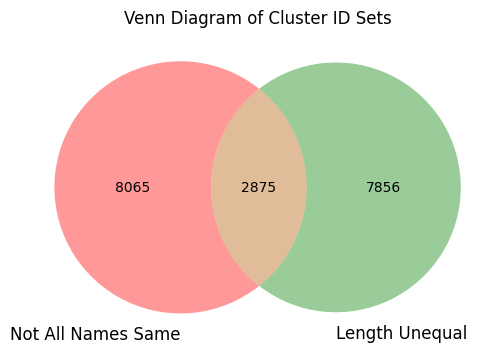

In [48]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Convert the lists to sets
set1 = set(not_all_names_same_cluster_ids)
set2 = set(length_unequal_cluster_ids)

# Compute the intersection, unique to set1, and unique to set2
only_set1 = len(set1 - set2)
only_set2 = len(set2 - set1)
intersection = len(set1.intersection(set2))

# Plot the Venn diagram
plt.figure(figsize=(6, 6))
venn2(subsets=(only_set1, only_set2, intersection), 
      set_labels=('Not All Names Same', 'Length Unequal'))
plt.title("Venn Diagram of Cluster ID Sets")
plt.show()

In [49]:
# Convert the lists to sets
set1 = set(not_all_names_same_cluster_ids)
set2 = set(length_unequal_cluster_ids)

# Find the union of the two sets
union_cluster_ids = set1.union(set2)  # or use set1 | set2
print(f"Number of unique cluster IDs in the union: {len(union_cluster_ids)}")
print(f"Union of cluster IDs: {union_cluster_ids}")

Number of unique cluster IDs in the union: 18796
Union of cluster IDs: {393219, 262152, 262153, 11, 262158, 393231, 262161, 262172, 196637, 262175, 196640, 458794, 44, 458797, 262193, 131127, 262200, 262209, 393281, 196678, 196683, 393299, 393311, 393312, 393319, 65643, 131189, 131193, 262268, 196737, 65670, 134, 131213, 262289, 131221, 262299, 65694, 65700, 327847, 65705, 131245, 65709, 458928, 458931, 181, 262329, 65725, 393407, 65733, 131271, 196812, 131284, 327899, 131300, 65769, 65772, 458994, 393458, 196856, 131329, 257, 196870, 393485, 459025, 262428, 459039, 196898, 459052, 131378, 65848, 459064, 196921, 131389, 131394, 262469, 131398, 328011, 131408, 131409, 328019, 131411, 459094, 196964, 262504, 393579, 196974, 328046, 328048, 262511, 393584, 328053, 196985, 131449, 393596, 393597, 196991, 131456, 196992, 131458, 196993, 131460, 390, 197000, 131468, 328077, 131473, 131480, 393628, 197024, 65952, 393634, 131489, 262562, 459171, 131494, 393637, 393635, 393642, 65968, 197049, 1

In [50]:
first_run_clust

,cluster_id,cluster_size,node_ids_in_cluster,Group Items,length_one,length_same,all_names_same
0,174666,6,"[ancestral stress treatment [environment], anc...","[ancestral stress treatment [environment], anc...",False,True,True
1,4934,3,"[substitution of Val by Met [mutation], Tyr to...","[substitution of Val by Met [mutation], Tyr to...",False,True,True
2,329097,27,"[pairwise alignments [phenotype], Comparative ...",[understanding evolutionary relationships [phe...,False,True,True
3,148225,6,"[known orthologs of A. thaliana [organism], co...","[counterparts in A. thaliana [organism], known...",False,True,True
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ...","[Erianthus arundinaceus [organism], E. sativa ...",False,True,True
...,...,...,...,...,...,...,...
393887,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[PIF6-beta [rna], loss of EIN4 [gene], Loss of...",False,True,True
393888,449343,10,"[MADS-box TFs [gene], TFs from the MADS-box pr...","[MADS-box TFs [gene], MADS box family TFs [gen...",False,False,False
393889,160525,3,[the motor domain with ATPase activity [protei...,[the motor domain with ATPase activity [protei...,False,True,True
393890,179048,2,"[wider repla [phenotype], larger sizes of reco...","[wider repla [phenotype], larger sizes of reco...",False,True,True


In [51]:
#print rows where length_same is True, length_one is False and all_names_same is True

filt_first_clust = first_run_clust[(first_run_clust['length_same'] == True) & (first_run_clust['length_one'] == False) & (first_run_clust['all_names_same'] == True)]

In [52]:
filt_first_clust = filt_first_clust.reset_index(drop=True)
filt_first_clust

,cluster_id,cluster_size,node_ids_in_cluster,Group Items,length_one,length_same,all_names_same
0,174666,6,"[ancestral stress treatment [environment], anc...","[ancestral stress treatment [environment], anc...",False,True,True
1,4934,3,"[substitution of Val by Met [mutation], Tyr to...","[substitution of Val by Met [mutation], Tyr to...",False,True,True
2,329097,27,"[pairwise alignments [phenotype], Comparative ...",[understanding evolutionary relationships [phe...,False,True,True
3,148225,6,"[known orthologs of A. thaliana [organism], co...","[counterparts in A. thaliana [organism], known...",False,True,True
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ...","[Erianthus arundinaceus [organism], E. sativa ...",False,True,True
...,...,...,...,...,...,...,...
374198,145333,3,[triazolyl phenyl disulfide derivatives [molec...,[triazolyl phenyl disulfide derivatives [molec...,False,True,True
374199,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[PIF6-beta [rna], loss of EIN4 [gene], Loss of...",False,True,True
374200,160525,3,[the motor domain with ATPase activity [protei...,[the motor domain with ATPase activity [protei...,False,True,True
374201,179048,2,"[wider repla [phenotype], larger sizes of reco...","[wider repla [phenotype], larger sizes of reco...",False,True,True


In [53]:
#remove length_same, length_one and all_names_same columns
filt_first_clust = filt_first_clust.drop(columns=['length_same', 'length_one', 'all_names_same'])
filt_first_clust

,cluster_id,cluster_size,node_ids_in_cluster,Group Items
0,174666,6,"[ancestral stress treatment [environment], anc...","[ancestral stress treatment [environment], anc..."
1,4934,3,"[substitution of Val by Met [mutation], Tyr to...","[substitution of Val by Met [mutation], Tyr to..."
2,329097,27,"[pairwise alignments [phenotype], Comparative ...",[understanding evolutionary relationships [phe...
3,148225,6,"[known orthologs of A. thaliana [organism], co...","[counterparts in A. thaliana [organism], known..."
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ...","[Erianthus arundinaceus [organism], E. sativa ..."
...,...,...,...,...
374198,145333,3,[triazolyl phenyl disulfide derivatives [molec...,[triazolyl phenyl disulfide derivatives [molec...
374199,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[PIF6-beta [rna], loss of EIN4 [gene], Loss of..."
374200,160525,3,[the motor domain with ATPase activity [protei...,[the motor domain with ATPase activity [protei...
374201,179048,2,"[wider repla [phenotype], larger sizes of reco...","[wider repla [phenotype], larger sizes of reco..."


In [54]:
#add org_group_items column to the dataframe
filt_first_clust['Org Group Items'] = filt_first_clust['cluster_id'].map(all_outs_org_dict)
filt_first_clust

,cluster_id,cluster_size,node_ids_in_cluster,Group Items,Org Group Items
0,174666,6,"[ancestral stress treatment [environment], anc...","[ancestral stress treatment [environment], anc...","[[""ancestral stress treatment [environment]""],..."
1,4934,3,"[substitution of Val by Met [mutation], Tyr to...","[substitution of Val by Met [mutation], Tyr to...","[[""substitution of Val by Met [mutation]""], [""..."
2,329097,27,"[pairwise alignments [phenotype], Comparative ...",[understanding evolutionary relationships [phe...,"[[""**understanding evolutionary relationships ..."
3,148225,6,"[known orthologs of A. thaliana [organism], co...","[counterparts in A. thaliana [organism], known...","[[""**counterparts in A. thaliana [organism]**""..."
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ...","[Erianthus arundinaceus [organism], E. sativa ...","[[""Erianthus arundinaceus [organism]""], [""E. s..."
...,...,...,...,...,...
374198,145333,3,[triazolyl phenyl disulfide derivatives [molec...,[triazolyl phenyl disulfide derivatives [molec...,"[[""triazolyl phenyl disulfide derivatives [mol..."
374199,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[[""PIF6-beta [rna]""], [""loss of EIN4 [gene]""],..."
374200,160525,3,[the motor domain with ATPase activity [protei...,[the motor domain with ATPase activity [protei...,"[[""the motor domain with ATPase activity [prot..."
374201,179048,2,"[wider repla [phenotype], larger sizes of reco...","[wider repla [phenotype], larger sizes of reco...","[[""wider repla [phenotype]""], [""larger sizes o..."


In [55]:
#remove Group Items column
filt_first_clust = filt_first_clust.drop(columns=['Group Items'])
filt_first_clust

,cluster_id,cluster_size,node_ids_in_cluster,Org Group Items
0,174666,6,"[ancestral stress treatment [environment], anc...","[[""ancestral stress treatment [environment]""],..."
1,4934,3,"[substitution of Val by Met [mutation], Tyr to...","[[""substitution of Val by Met [mutation]""], [""..."
2,329097,27,"[pairwise alignments [phenotype], Comparative ...","[[""**understanding evolutionary relationships ..."
3,148225,6,"[known orthologs of A. thaliana [organism], co...","[[""**counterparts in A. thaliana [organism]**""..."
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ...","[[""Erianthus arundinaceus [organism]""], [""E. s..."
...,...,...,...,...
374198,145333,3,[triazolyl phenyl disulfide derivatives [molec...,"[[""triazolyl phenyl disulfide derivatives [mol..."
374199,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[[""PIF6-beta [rna]""], [""loss of EIN4 [gene]""],..."
374200,160525,3,[the motor domain with ATPase activity [protei...,"[[""the motor domain with ATPase activity [prot..."
374201,179048,2,"[wider repla [phenotype], larger sizes of reco...","[[""wider repla [phenotype]""], [""larger sizes o..."


In [56]:
#save the dataframe to a csv file
filt_first_clust.to_csv('/Users/manojitharajula/Documents/PhD/Connectome/Entity_disambiguation/kmeans/4omini_max_clust_30_type_disamb_first_run_filt_all_concat.csv', index=False)

In [57]:
first_run_clust

,cluster_id,cluster_size,node_ids_in_cluster,Group Items,length_one,length_same,all_names_same
0,174666,6,"[ancestral stress treatment [environment], anc...","[ancestral stress treatment [environment], anc...",False,True,True
1,4934,3,"[substitution of Val by Met [mutation], Tyr to...","[substitution of Val by Met [mutation], Tyr to...",False,True,True
2,329097,27,"[pairwise alignments [phenotype], Comparative ...",[understanding evolutionary relationships [phe...,False,True,True
3,148225,6,"[known orthologs of A. thaliana [organism], co...","[counterparts in A. thaliana [organism], known...",False,True,True
4,281542,23,"[Erianthus arundinaceus [organism], E. sativa ...","[Erianthus arundinaceus [organism], E. sativa ...",False,True,True
...,...,...,...,...,...,...,...
393887,318199,6,"[PIF6-beta [rna], loss of EIN4 [gene], Loss of...","[PIF6-beta [rna], loss of EIN4 [gene], Loss of...",False,True,True
393888,449343,10,"[MADS-box TFs [gene], TFs from the MADS-box pr...","[MADS-box TFs [gene], MADS box family TFs [gen...",False,False,False
393889,160525,3,[the motor domain with ATPase activity [protei...,[the motor domain with ATPase activity [protei...,False,True,True
393890,179048,2,"[wider repla [phenotype], larger sizes of reco...","[wider repla [phenotype], larger sizes of reco...",False,True,True
